In [1]:
%load_ext autoreload
%autoreload 2

### Import libraries

In [2]:
# Importing libraries
from pydyno.discretize_path import DomPath
from pydyno.seqanalysis import SeqAnalysis
from pydyno.visualize_discretization import visualization_seq_paths, visualization_path
from pysb.simulator import ScipyOdeSimulator
import numpy as np
from mm_two_paths_model import model
from pydyno.visualize_trajectories import VisualizeTrajectories
%matplotlib inline

/Users/dionisio/miniconda3/envs/pydyno/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Users/dionisio/miniconda3/envs/pydyno/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Load the calibrated parameters and simulate the model with 100 different parameter sets

In [3]:
pars = np.load('calibrated_pars.npy')
tspan = np.linspace(0, 100, 101)
sim = ScipyOdeSimulator(model, tspan=tspan).run(param_values=pars[:100], num_processors=1)

In [4]:
vt = VisualizeTrajectories(model, sim, clusters=None)

### Obtain the dominant paths for each of the simulations

In [5]:
dp = DomPath(model=model, simulations=sim, type_analysis='production', dom_om=1, target='s5', depth=2)
signatures, paths = dp.get_path_signatures(num_processors=1, verbose=True)

### The signatures variable contains the information about the dominant pathways at each time point for each of the simulations. Additionally, signatures have methods to obtain a dissimilarity matrix from the signatures, cluster these signatures and different visualizations. The paths variable contains the labels and the dominant paths that appear in signatures

In [6]:
signatures.sequences.head()

,,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0,100.0
seq_idx,count,,,,,,,,,,,,,,,,,,,,,
0,1,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
1,1,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
2,1,2,2,2,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
4,1,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1


In [7]:
signatures.dissimilarity_matrix(n_jobs=4)
signatures.silhouette_score_agglomerative_range(4)

,num_clusters,cluster_silhouette
0,2,0.995133
1,3,0.973921
2,4,0.975000


In [8]:
signatures.agglomerative_clustering(2)

In [30]:
import json
a=json.dumps(paths, separators=(',', ':'))

In [31]:
a

'{"2":{"order":0,"name":"s5","children":[{"order":1,"name":"s3","children":[{"order":2,"name":"s0"},{"order":2,"name":"s1"}]},{"order":1,"name":"s4","children":[{"order":2,"name":"s0"},{"order":2,"name":"s2"}]}]},"1":{"order":0,"name":"s5","children":[{"order":1,"name":"s4","children":[{"order":2,"name":"s0"},{"order":2,"name":"s2"}]}]},"0":{"order":0,"name":"s5","children":[{"order":1,"name":"s3","children":[{"order":2,"name":"s0"},{"order":2,"name":"s1"}]}]}}'

In [29]:
json.loads(a)

{'2': {'order': 0,
  'name': 's5',
  'children': [{'order': 1,
    'name': 's3',
    'children': [{'order': 2, 'name': 's0'}, {'order': 2, 'name': 's1'}]},
   {'order': 1,
    'name': 's4',
    'children': [{'order': 2, 'name': 's0'}, {'order': 2, 'name': 's2'}]}]},
 '1': {'order': 0,
  'name': 's5',
  'children': [{'order': 1,
    'name': 's4',
    'children': [{'order': 2, 'name': 's0'}, {'order': 2, 'name': 's2'}]}]},
 '0': {'order': 0,
  'name': 's5',
  'children': [{'order': 1,
    'name': 's3',
    'children': [{'order': 2, 'name': 's0'}, {'order': 2, 'name': 's1'}]}]}}

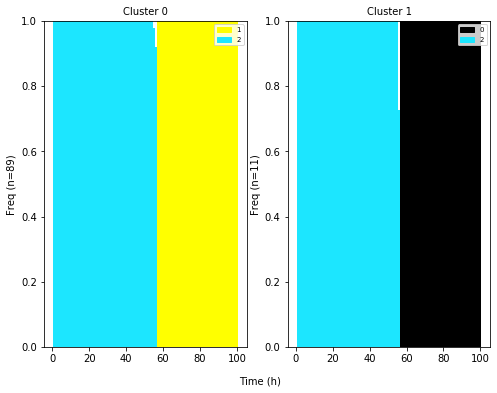

In [11]:
signatures.plot_sequences()

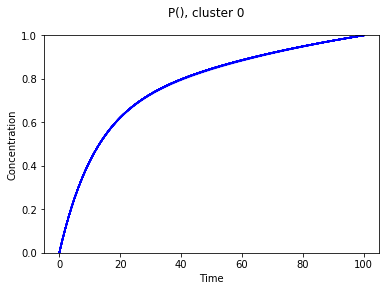

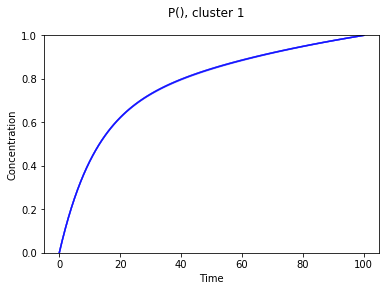

In [12]:
clusters = signatures.labels
ac = VisualizeTrajectories(model=model, sim_results=sim, clusters=clusters)
ac.plot_cluster_dynamics(species=[5], norm=True)

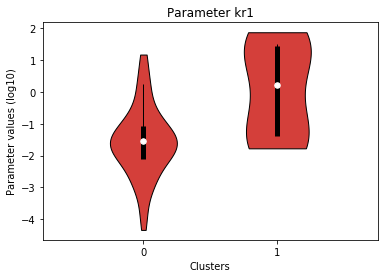

In [13]:
ac.plot_violin_kd([(1,2)])

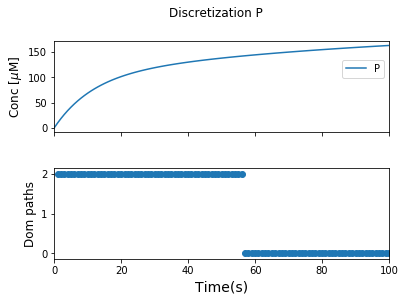

In [14]:
visualization_seq_paths(sim, 0, signatures)